### Lab1.2. Disease prediction
I det här momentet kommer vi jobba med ett dataset med data för hjärt-kärlsjukdom. Börja med att ladda
ned datasetet från Kaggle och läs på vad de olika features betyder. Notera att detta dataset innehåller
många felaktigheter, exempelvis finns negativa blodtryck och blodtryck som är omöjligt höga.

---
2.0 - EDA uppvärmning
Använd pandas, matplotlib och seaborn för att besvara på följande frågor för datasetet:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from my_functions import fixOutliers, box_plot, getWhisker, cardioProp, train_val_test_split, getEvaMetrics

Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [2]:
df_cardio_train = pd.read_csv("data/cardio_train.csv", sep=";")
df_cardio_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df_cardio_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [4]:
df_cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
cardio_n = pd.DataFrame(df_cardio_train["cardio"].value_counts())

In [6]:
cardio_n

,cardio
0,35021
1,34979


In [7]:
cardio_count = df_cardio_train["cardio"].value_counts().to_frame()

print(f"There are {cardio_n['cardio'].iloc[1]} positive cases for cardiovascular disease")
print(f"There are {cardio_n['cardio'].iloc[0]} negative cases for cardiovascular disease")

There are 34979 positive cases for cardiovascular disease
There are 35021 negative cases for cardiovascular disease


b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [8]:
cholesterol_n = pd.DataFrame(df_cardio_train["cholesterol"].value_counts())

In [9]:
cholesterol_sum=pd.DataFrame(cholesterol_n.sum(axis=0))

In [10]:
cholesterol_n['prop_cholesterol'] = cholesterol_n['cholesterol']/cholesterol_sum.iloc[0,0]
cholesterol_n

,cholesterol,prop_cholesterol
1,52385,0.748357
2,9549,0.136414
3,8066,0.115229


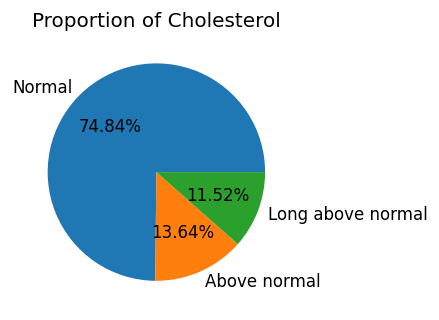

In [11]:
fig, ax = plt.subplots(dpi=120, figsize=(3,3), facecolor="white")
plt.pie(cholesterol_n["cholesterol"], labels=["Normal", "Above normal", "Long above normal"], autopct="%1.2f%%")
ax.set_title("Proportion of Cholesterol");

c) Hur ser åldersfördelningen ut? Rita ett histogram.
Age | Objective Feature | age | int (days)

In [12]:
df_cardio_train['age_in_years'] = df_cardio_train["age"]/365
df_cardio_train['age_in_years'].describe()

count    70000.000000
mean        53.339358
std          6.759594
min         29.583562
25%         48.394521
50%         53.980822
75%         58.430137
max         64.967123
Name: age_in_years, dtype: float64

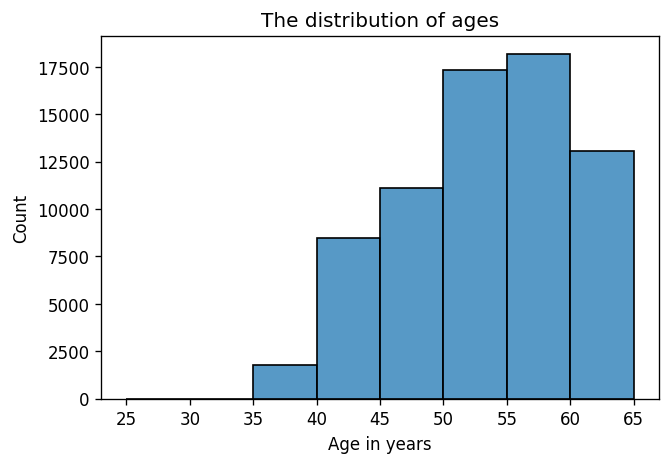

In [13]:
fig = plt.figure(dpi=120)
ax = sns.histplot(df_cardio_train['age_in_years'], bins=range(25, 70, 5))
ax.set(title="The distribution of ages", xlabel="Age in years");

d) Hur stor andel röker?


In [14]:
print(f"There are {df_cardio_train['smoke'].sum()/len(df_cardio_train)*100:.2f}% of the person in the dataset smoke.")

There are 8.81% of the person in the dataset smoke.


e) Hur ser viktfördelningen ut? Rita lämpligt diagram

In [15]:
df_cardio_train["weight"].describe().T

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

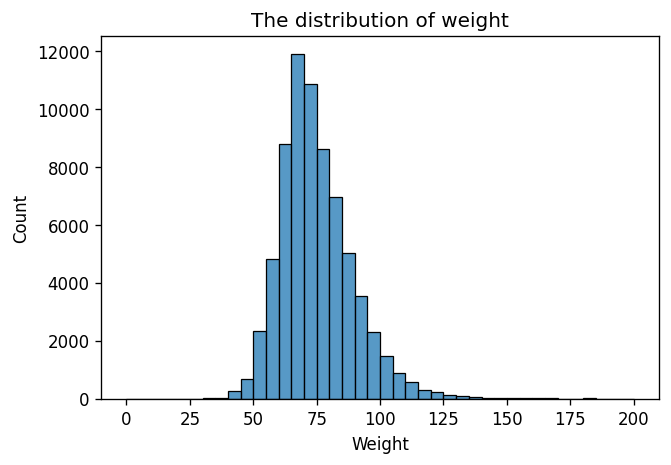

In [16]:
fig, ax = plt.subplots(dpi=120)
sns.histplot(df_cardio_train["weight"], bins=range(0, 205, 5))
ax.set(title="The distribution of weight", xlabel="Weight");

f) Hur ser längdfördelningen ut? Rita lämpligt diagram

In [17]:
df_cardio_train["height"].describe().T

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

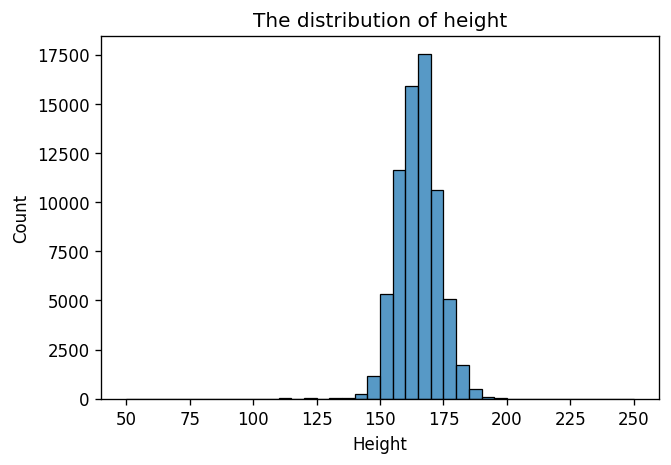

In [18]:
fig, ax = plt.subplots(dpi=120)
sns.histplot(df_cardio_train["height"], bins=range(50, 255, 5))
ax.set(title="The distribution of height", xlabel="Height");

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

In [19]:
df_cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [20]:
df_cardio_train[['height', 'gender']].groupby('gender').agg(np.mean)

,height
gender,
1,161.355612
2,169.947895


The data source does not tell which dummy value of gender stands for male, and which is female. To get an hint, I calculated the average height among gender 1 and 2. 

The result shows that gender 2 has a higher height compre to gender 1. 

It is thereby assumed in my answer that gender=1 when gender == female. And gender 2 stands for male.

In [21]:
cardio_gender = cardioProp(df_cardio_train, 'gender')

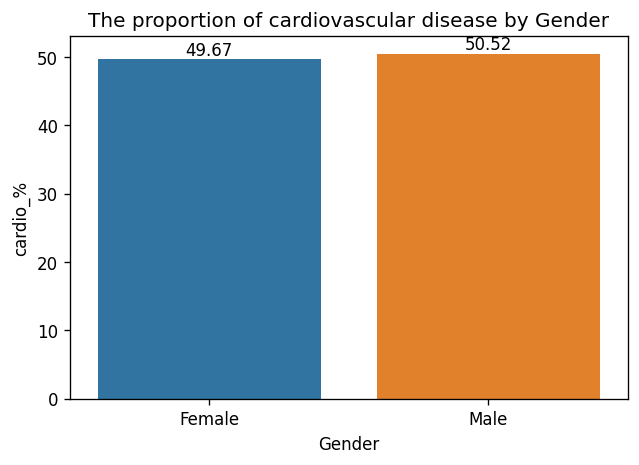

In [22]:
fig, ax = plt.subplots(1,1, dpi=120)
sns.barplot(data=cardio_gender, x=['Female', 'Male'], y='cardio_%')
ax.set(xlabel="Gender", title="The proportion of cardiovascular disease by Gender")
ax.bar_label(ax.containers[0]);
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html

---
### 2.1.0 - Feature engineering BMI

Skapa en feature för BMI (Body Mass Index), läs på om formeln på wikipedia.

a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket
range av BMIer som vi ska spara. Beskriv hur du gör avvägningen.

 ---
 **Answers**: Firstly, I make a boxplot to check the distribution of BMI, weight, height and age. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

 I consider height and weight is because I found that the max of height is 250cm and max weight of 200kg, which is kind of suspicious.

 I take age into consideration, because A child’s weight status is different from adult BMI categories [source][link_child]. 

 [link_child]:https://www.cdc.gov/obesity/childhood/defining.html


 Thereafter, I try to check the following critirion, in a statistic sense, to remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

Finally, I use the expert knowledge [Body Mass Index Table][link] to make judgement about the outliers. The tables shows a range of (19, 54). 
Considering the Adult Body Mass Index (BMI) in the same page.

[link]: https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf


The source comes from Centers for disease control and prevention: [Defining Adult Overweight & Obesity][link of source]. 

[link of source]: https://www.cdc.gov/obesity/adult/defining.html?msclkid=6f823c0ea9c211ec87ed78aacca489be

In [23]:
df_cardio_train["BMI"] = df_cardio_train["weight"] / ((df_cardio_train["height"]/100)**2)
df_cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177


In [24]:
df_cardio_train[["BMI", "weight", "height", "age_in_years"]].describe()

,BMI,weight,height,age_in_years
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,27.556513,74.205690,164.359229,53.339358
std,6.091511,14.395757,8.210126,6.759594
min,3.471784,10.000000,55.000000,29.583562
25%,23.875115,65.000000,159.000000,48.394521
50%,26.374068,72.000000,165.000000,53.980822
75%,30.222222,82.000000,170.000000,58.430137
max,298.666667,200.000000,250.000000,64.967123


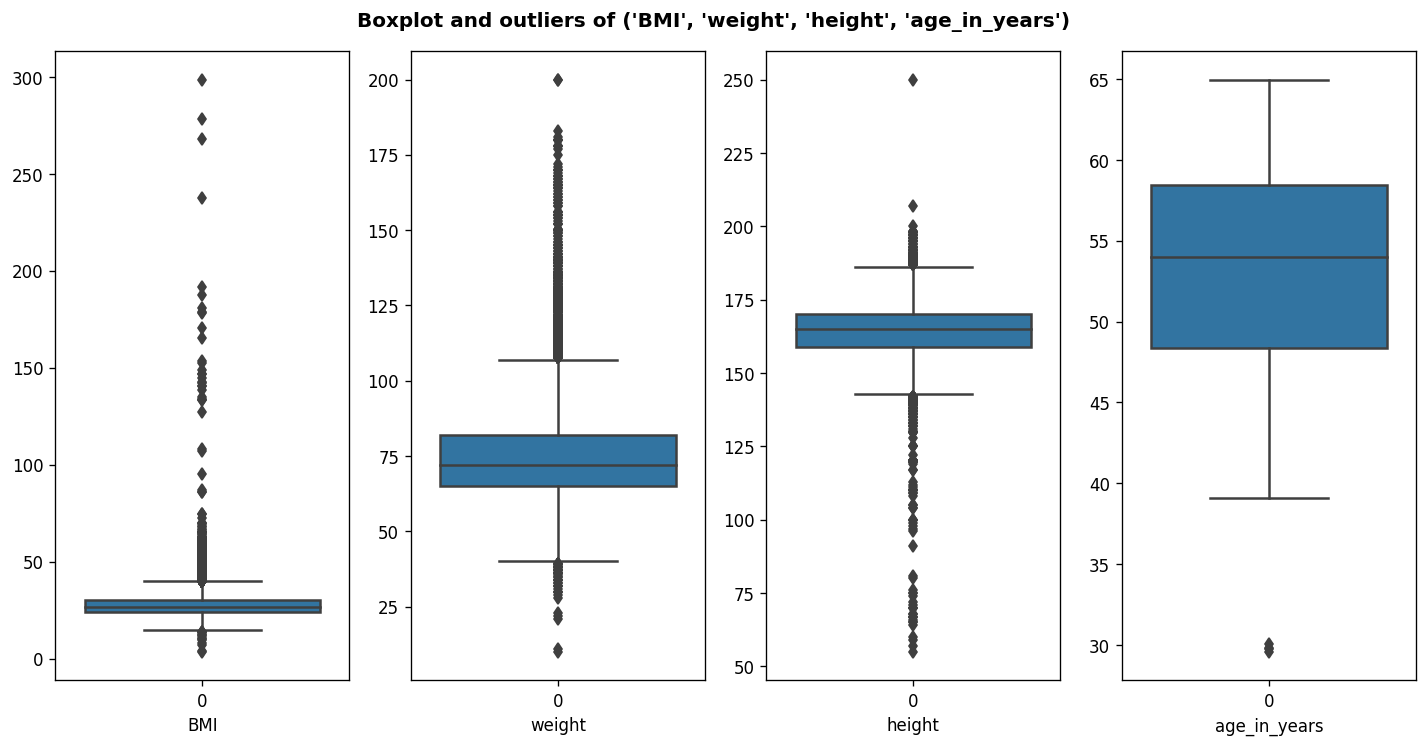

In [25]:
box_plot(df_cardio_train, 'BMI', 'weight', 'height', 'age_in_years')

In [26]:
getWhisker(df_cardio_train, 'BMI')
getWhisker(df_cardio_train, 'weight')
getWhisker(df_cardio_train, 'height')
getWhisker(df_cardio_train, 'age_in_years')

the lower whisker of BMI: 14.35, the upper whisker of BMI: 39.74
the lower whisker of weight: 39.50, the upper whisker of weight: 107.50
the lower whisker of height: 142.50, the upper whisker of height: 186.50
the lower whisker of age_in_years: 33.34, the upper whisker of age_in_years: 73.48


1. From both the description and boxplot of BMI, we find that the space between 1st quantile(25%) and 3rd qunatile(75%) is very small, like a black box. It is in a range round (24, 30).

2. There are a lot of extreme BMI values locates far away from the  interquartile range (IRQ).

3. we can see clearly that all the sample data are adult in age_in_years figure. The lower point is 29 years old, which means that we should remove the weight and height with extremely small numbers for adults.

4. The [List of heaviest people][link_List of heaviest people] shows that highest peak weight is 635kg, and highest BMI is 251.

[link_List of heaviest people]:https://en.wikipedia.org/wiki/List_of_heaviest_people?msclkid=b09850e1a9cf11ec8af5a02c225eca23

5. The [List of the verified shortest people][link shortest people] shows that the shortest adultc lived in the world is 54.6cm. Height confirmed by Guinness World Records.

[link shortest people]: https://en.wikipedia.org/wiki/List_of_the_verified_shortest_people?msclkid=a04fa7faa9d411ec9a2e552a9d4480a0

6. The [List of tallest people][link List of tallest people] shows that the tallest people is 275cm.

[link List of tallest people]: https://en.wikipedia.org/wiki/List_of_tallest_people?msclkid=2fe4d495a9d711ec8b761a29c1510d5b

7. I therefore think it is saft to remove the weight under 54.6cm or the lower whisker, instead of high outliers of weight and height. After that, I am goint to check again the description of BMI.

In [27]:
df_cardio_train_reduce_weight = fixOutliers(df_cardio_train, 'weight', to_do='low')
df_cardio_train_reduce_weight_height = fixOutliers(df_cardio_train_reduce_weight, 'height', to_do='low', low_boundary= 54.6)

In [28]:
df_cardio_train_reduce_weight_height.shape, df_cardio_train_reduce_weight.shape, df_cardio_train.shape

((69948, 15), (69948, 15), (70000, 15))

In [29]:
df_cardio_train_reduce_weight_height[["BMI", "weight", "height", "age_in_years"]].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,69948.0,27.565729,6.083558,13.520822,23.875115,26.395803,30.222222,298.666667
weight,69948.0,74.235659,14.358018,40.000000,65.000000,72.000000,82.000000,200.000000
height,69948.0,164.368874,8.199857,55.000000,159.000000,165.000000,170.000000,250.000000
age_in_years,69948.0,53.337994,6.759549,29.583562,48.391781,53.980822,58.427397,64.967123


In [30]:
df_cardio_train_reduce_weight_height[df_cardio_train_reduce_weight_height['BMI']>250]
# shows the samples whose BMI is larger than 250.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
12770,18218,19594,1,75,168.0,120,80,1,1,1,0,1,1,53.682192,298.666667
22723,32456,23386,1,55,81.0,130,90,1,1,0,0,1,1,64.071233,267.768595
27384,39156,15292,1,80,178.0,140,90,3,3,0,0,1,1,41.895890,278.125000


Now check again the description of BMI, it is located in the range of [13.52, 298.7]. This is still high, considering the BMI information in wikipedia and Centers for disease control and prevention. I therefore choose to filter the high outliers to 251, highest in the list of the heavist people.

In [31]:
df_cardio_train_reduce_weight_height_BMI=fixOutliers(df_cardio_train_reduce_weight_height, 'BMI', 'high', high_boundary=251)
df_cardio_train_reduce_weight_height_BMI.shape, df_cardio_train_reduce_weight_height.shape

((69945, 15), (69948, 15))

In [32]:
df_cardio_train_reduce_weight_height_BMI[df_cardio_train_reduce_weight_height_BMI['BMI']>180]
# shows the samples whose BMI is larger than 180.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
8171,11662,17646,2,97,170.0,160,100,1,1,1,0,1,1,48.345205,180.678074
23913,34186,19074,1,81,156.0,140,90,1,1,0,0,1,0,52.257534,237.768633
29157,41661,19088,1,60,69.0,110,70,1,1,0,0,0,0,52.295890,191.666667
66643,95141,18830,1,57,61.0,130,90,1,1,0,0,1,1,51.589041,187.750077


b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese
(class II), obese (class III).

In [33]:
df_reduced = df_cardio_train_reduce_weight_height_BMI.copy()

In [34]:
df_reduced.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177


In [35]:
# Reference: https://stackoverflow.com/questions/32633977/how-to-create-categorical-variable-based-on-a-numerical-variable
df_reduced=df_reduced.assign(blood_cat=np.nan)

df_reduced.loc[(df_reduced["BMI"] < 18.5), "BMI_cat"] = "underweight"
df_reduced.loc[(df_reduced["BMI"] >= 18.5) & (df_reduced["BMI"] < 25), "BMI_cat"] = "normal"
df_reduced.loc[(df_reduced["BMI"] >= 25) & (df_reduced["BMI"] < 30), "BMI_cat"] = "overweight"
df_reduced.loc[(df_reduced["BMI"] >= 30) & (df_reduced["BMI"] < 35), "BMI_cat"] = "obese(class I)"
df_reduced.loc[(df_reduced["BMI"] >= 35) & (df_reduced["BMI"] < 40), "BMI_cat"] = "obese(class II)"
df_reduced.loc[(df_reduced["BMI"] >= 40), "BMI_cat"] = "obese(class III)"

df_reduced.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI,blood_cat,BMI_cat
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,NaN,normal
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,NaN,obese(class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,NaN,normal
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,NaN,overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,NaN,normal


### 2.1.1 - Feature engineering blodtryck
Släng bort samples med orimliga blodtryck och outliers. Likt uppgift 2.1.0 är det inte trivialt att sätta
gränserna. Skapa en feature för blodtryckskategorier enligt tabellen i denna artikel.


In [36]:
getWhisker(df_reduced, 'ap_hi')
getWhisker(df_reduced, 'ap_lo')

the lower whisker of ap_hi: 90.00, the upper whisker of ap_hi: 170.00
the lower whisker of ap_lo: 65.00, the upper whisker of ap_lo: 105.00


In [37]:
df_reduced[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,69945.000000,69945.000000
mean,128.826178,96.606448
std,154.070532,188.445400
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


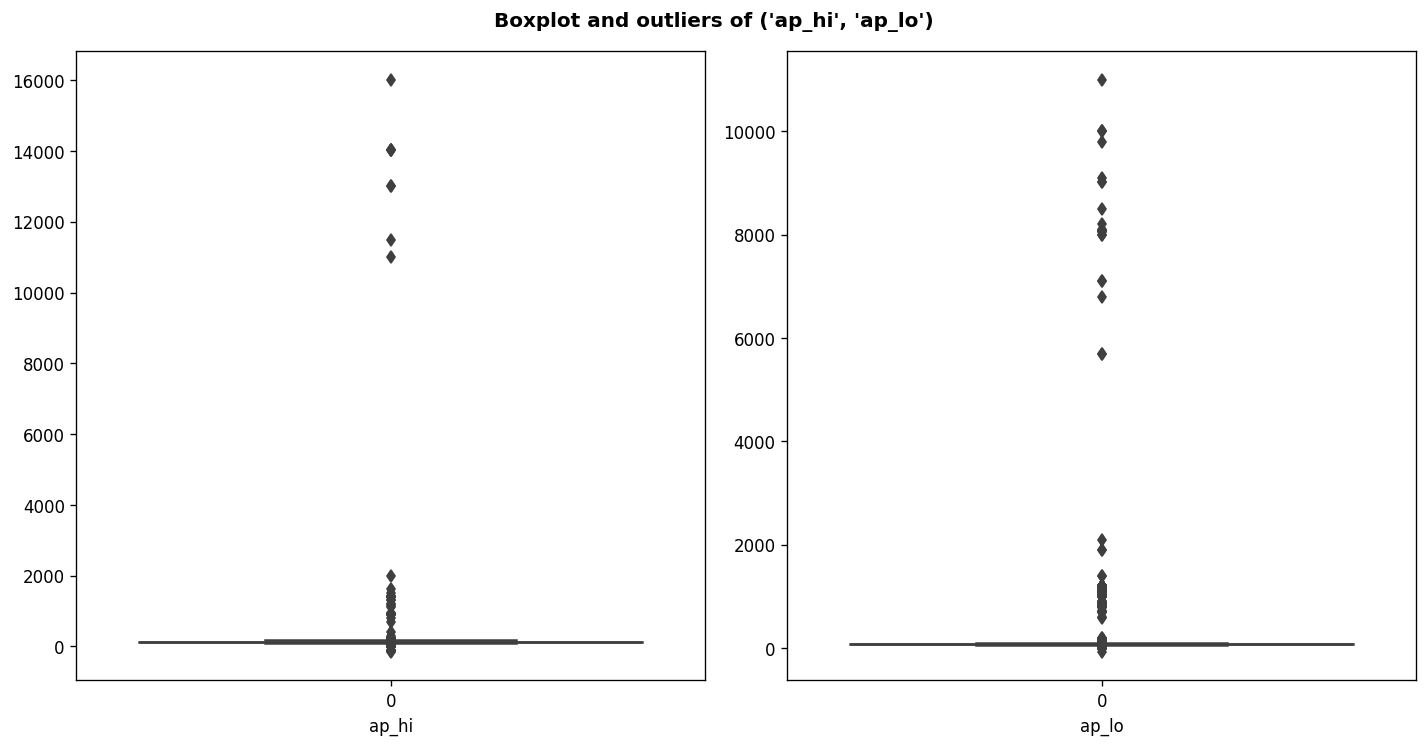

In [38]:
box_plot(df_reduced, 'ap_hi', 'ap_lo')
# boxplot of data removed unrealistic weight and height

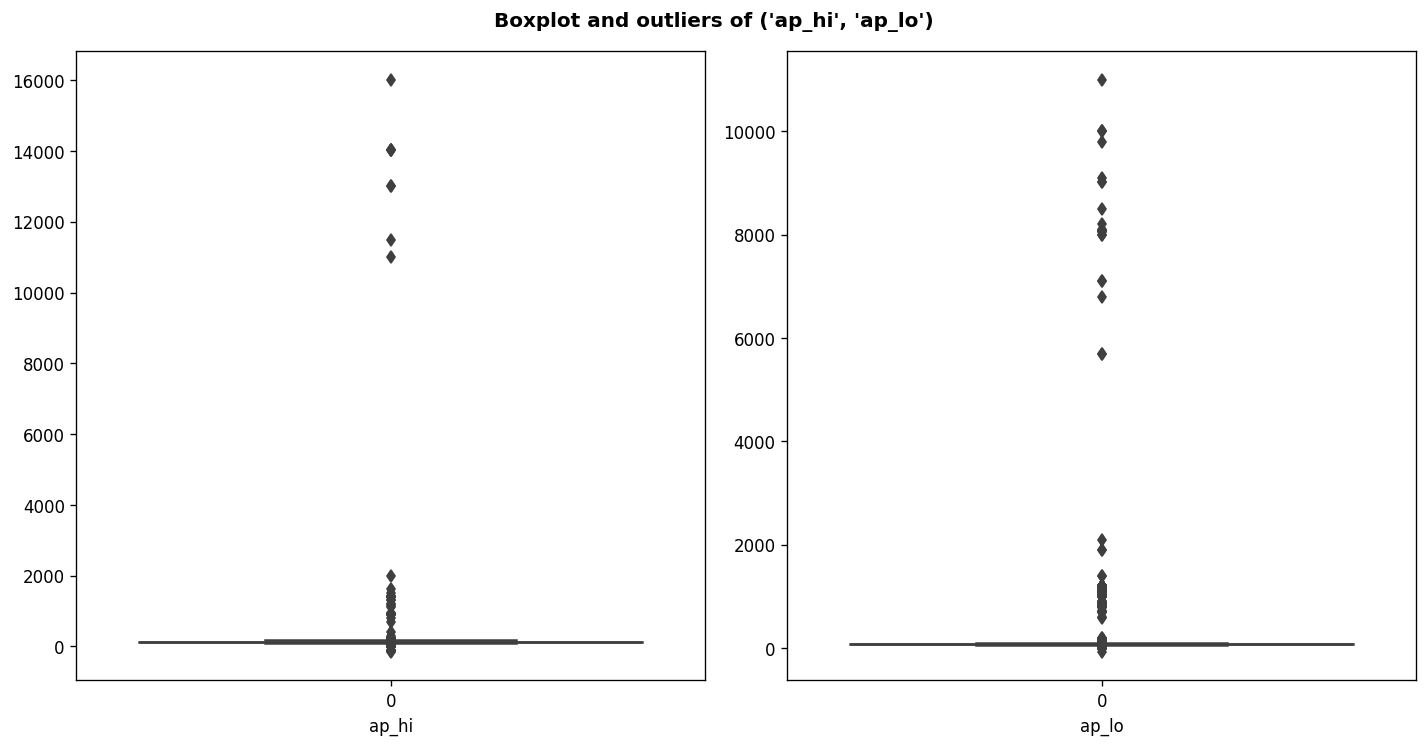

In [39]:
# boxplot of orginal data
box_plot(df_cardio_train, 'ap_hi', 'ap_lo')

In both figures, we see that there are some outliers, t.ex. above 16000, and negative numbers.

In [Everything You Need to Know About High Blood Pressure (Hypertension)][link_Everything You Need to Know About High Blood Pressure (Hypertension)]:

[link_Everything You Need to Know About High Blood Pressure (Hypertension)]: https://www.healthline.com/health/high-blood-pressure-hypertension, 
It stated that: "Hypertensive crisis: The systolic number is over 180 mm Hg, or the diastolic number is over 120 mm Hg. Blood pressure in this range requires urgent medical attention. If any symptoms like chest pain, headache, shortness of breath, or visual changes occur when blood pressure is this high, medical care in the emergency room is needed."

since the systolic blood pressure with 180 is larger than our upper whisker 170, I therefore neglect the upper wisker, and choose 200. the low boundary is set to 120-20

since the diastolic blood pressure with 120 is larger than our upper whisker 105, I therefore neglect the upper wisker, and choose 140. the low boundary is set to 80-20

In [40]:
df_reduced_temp = fixOutliers(df_reduced, 'ap_hi', to_do='high', high_boundary=200)
df_reduced_temp = fixOutliers(df_reduced_temp, 'ap_hi', to_do='low', low_boundary=100)
df_reduced_temp = fixOutliers(df_reduced_temp, 'ap_lo', to_do='high', high_boundary=140)
df_reduced_2 = fixOutliers(df_reduced_temp, 'ap_lo', to_do='low', low_boundary=60)
df_reduced_2.shape, df_reduced.shape

((68307, 17), (69945, 17))

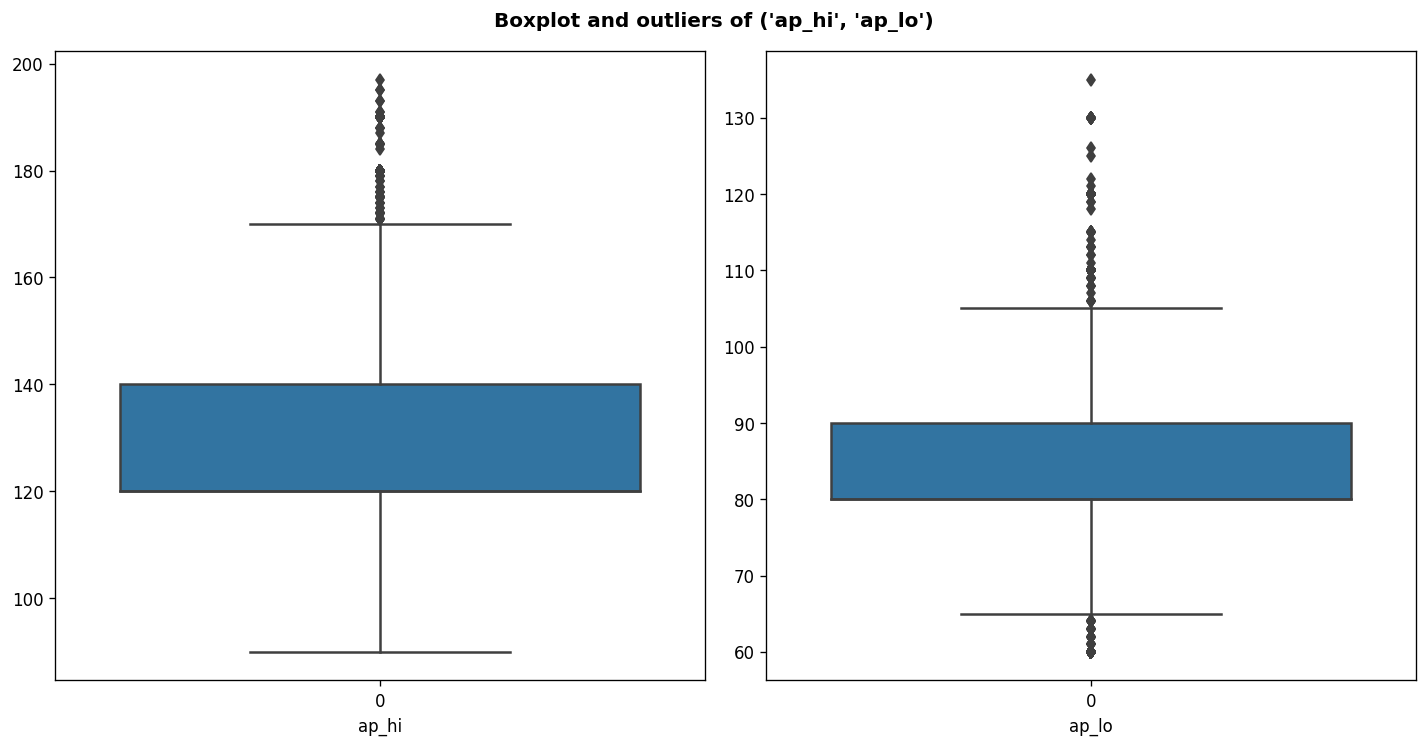

In [41]:
# boxplot of reduced dataset by unrealistic weight, height, and blood pressure
box_plot(df_reduced_2, 'ap_hi', 'ap_lo')

In [42]:
# Reference: https://stackoverflow.com/questions/32633977/how-to-create-categorical-variable-based-on-a-numerical-variable
df_reduced_2=df_reduced_2.assign(blood_cat=np.nan)

df_reduced_2.loc[(df_reduced_2["ap_hi"] < 120) & (df_reduced_2["ap_lo"] < 80), "blood_cat"] = "healthy"
df_reduced_2.loc[(df_reduced_2["ap_hi"] >= 120) & (df_reduced_2["ap_hi"] < 130) & (df_reduced_2["ap_lo"] < 80), 
            "blood_cat"] = "elevated"
df_reduced_2.loc[((df_reduced_2["ap_hi"] >= 130) & (df_reduced_2["ap_hi"] < 140)) | ((df_reduced_2["ap_lo"] >= 80) & (df_reduced_2["ap_lo"] < 90)), 
            "blood_cat"] = "hypertension stage 1"
df_reduced_2.loc[((df_reduced_2["ap_hi"] >= 140) & (df_reduced_2["ap_hi"] <= 180)) | ((df_reduced_2["ap_lo"] >= 90) & (df_reduced_2["ap_lo"] <= 120)), 
            "blood_cat"] = "hypertension stage 2"
df_reduced_2.loc[(df_reduced_2["ap_hi"] > 180) | (df_reduced_2["ap_lo"] > 120), "blood_cat"] = "hypertension crisis"


In [43]:
df_reduced_2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI,blood_cat,BMI_cat
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,hypertension stage 1,normal
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,hypertension stage 2,obese(class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,hypertension stage 1,normal
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,hypertension stage 2,overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,healthy,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.927438,hypertension stage 1,overweight
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.472681,hypertension stage 2,obese(class III)
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.353579,hypertension stage 2,obese(class I)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.099251,hypertension stage 1,overweight


### 2.2.0 - Visualiseringar andel sjukdomar
Skapa barplots med en feature mot andelen positiva för hjärt-kärlsjukdom. Exempelvis blodtryckskategorier
mot andel positiva, BMI kategori mot andel positiva mm. Gör dessa plots i en figur med flera subplots.

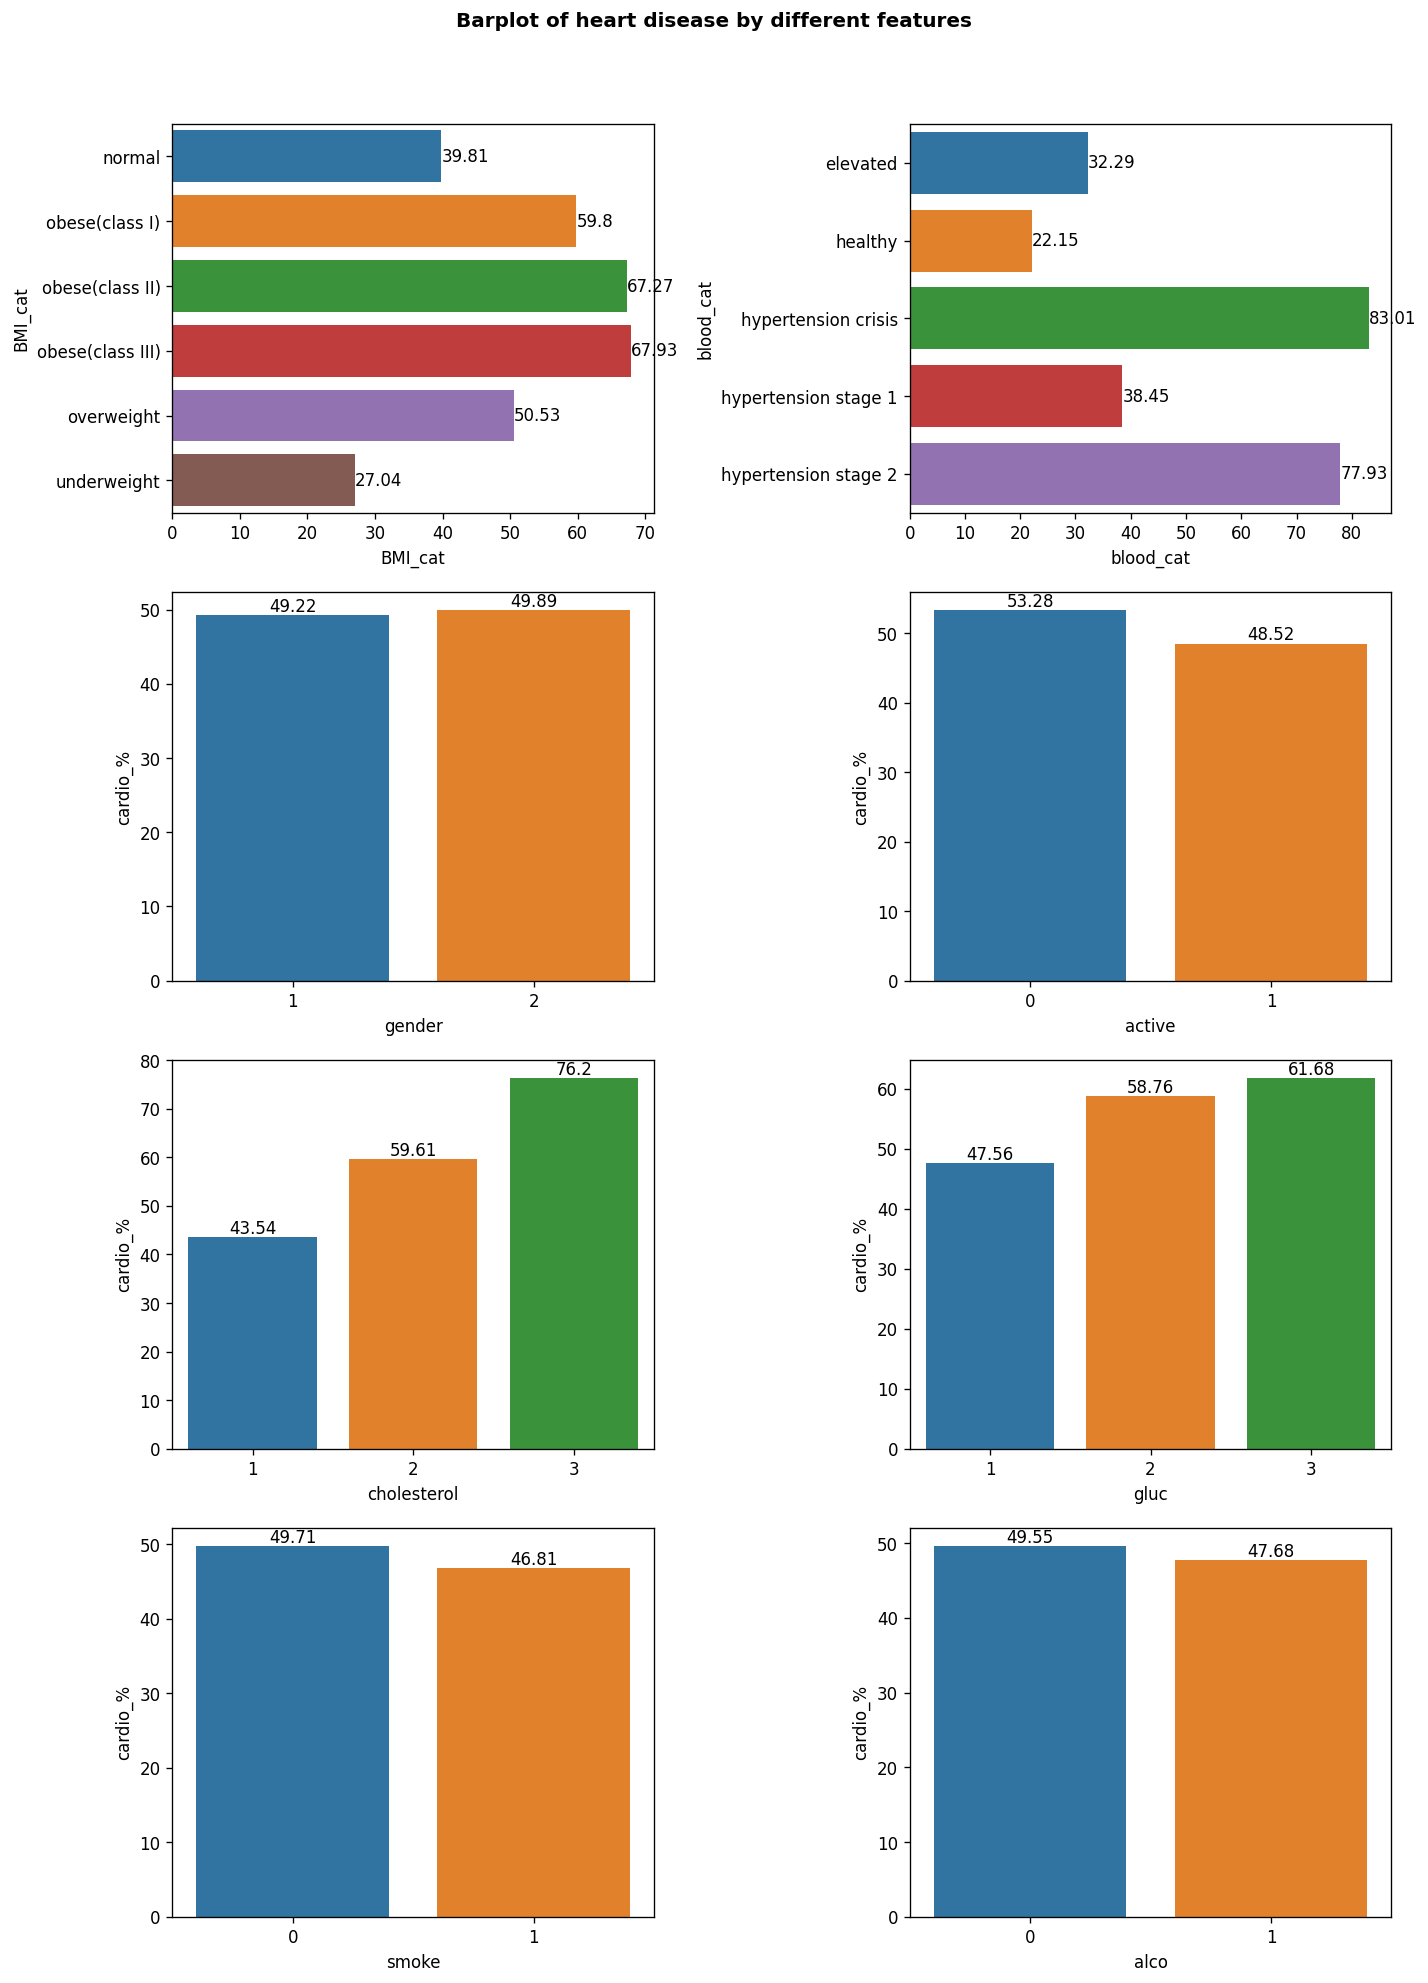

In [44]:
features= ["BMI_cat", "blood_cat", "gender",  "active", "cholesterol", "gluc", "smoke", "alco"]

fig, axes = plt.subplots(4, 2, figsize=(12, 16), dpi=120)
count_n = 0


for ax, feature in zip(axes.flatten(), features):
    df_temp = cardioProp(df_reduced_2, feature)
    if count_n <=1:
        sns.barplot(data=df_temp, y=df_temp.index, x='cardio_%',  ax=ax)
    else:
        sns.barplot(data=df_temp, x=df_temp.index, y='cardio_%',  ax=ax)
    ax.set(xlabel=feature)
    ax.bar_label(ax.containers[0])
    fig.tight_layout()
    fig.suptitle(f"Barplot of heart disease by different features", y=1.03, fontweight="bold");
    count_n += 1

### 2.2.1 - Visualiseringar korrelation

Skapa en heatmap av korrelationer och se om du hittar features som är starkt korrelerade, dvs nära 1 eller
features som är starkt negativt korrelerade, dvs nära -1. Kan du förklara varför de kan vara korrelerade?

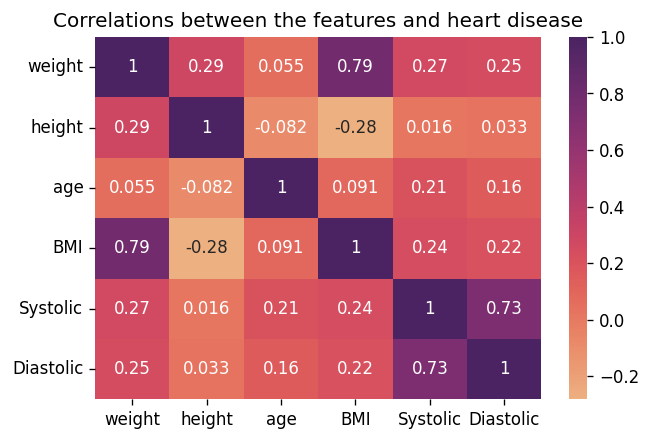

In [45]:
features= ["weight", "height", "age_in_years", "BMI", "ap_hi", "ap_lo"]
features_names= ["weight", "height", "age", "BMI", "Systolic", "Diastolic"]


fig, ax = plt.subplots(dpi=120)
sns.heatmap(df_reduced_2[features].corr(), 
                cmap="flare", 
                annot=True, 
                xticklabels=features_names, 
                yticklabels=features_names
                )

ax.set_title("Correlations between the features and heart disease");

**Findings**:
1. The linear correlation between BMI and weight is 0.79. The correaltion between BMI and height is -0.28. 
This finding can be explained by the definition of BMI: BMI=weight/height.
The definition indicates that BMI is higher in case weight is heavior(positive correlation), given same height. On the other hand, the BMI is lower in case height is taller(negative correlation), given same weight value.

2. The correlation between weight and height is 0.29, which indicates a slight positive correlation. It is reasonale because generally the taller person has larger weight.

3. The ap_hi and ap_lo has a slight positive correlation between weight, 0.27 and 0.25. It is reasonable that heavier person generally have more heart disease. 
On the contrary, the ap_hi and ap_lo has alsmot no relationship between height, which is also promising. The height is neutral to heart disease. For every person, no matter tall or short, we should work on keeping our weight in the healthy range to prevent heart disease.

4. I find a slight positive correlation between ap_hi and BMI, and so do ap_lo and BMI. This is because these features have a common effect from weight. Higher weight is positively correlated with both heart disease and BMI. 



---
### 2.3 - Skapa två dataset

Skapa en kopia av ditt dataframe. På ena dataframet:
- ta bort följande features: ap_hi, ap_lo, height, weight, BMI
- gör one-hot encoding på BMI-kategori, blodtryckskategori, kön

På andra dataframet:
- ta bort följande features: BMI-kategori, blodtryckskategori, height, weight
- gör one-hot encoding på kön

In [46]:
df_categorical_1 = pd.get_dummies(df_reduced_2, columns = ["gender", "BMI_cat", "blood_cat"], prefix=["gender", "BMI_", "blood_"], prefix_sep="_", drop_first=True)
df_categorical_1 = df_categorical_1.drop(["height", "weight", "ap_hi", "ap_lo"], axis=1)
df_categorical_1.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI,gender_2,BMI__obese(class I),BMI__obese(class II),BMI__obese(class III),BMI__overweight,BMI__underweight,blood__healthy,blood__hypertension crisis,blood__hypertension stage 1,blood__hypertension stage 2
0,0,18393,1,1,0,0,1,0,50.391781,21.967120,1,0,0,0,0,0,0,0,1,0
1,1,20228,3,1,0,0,1,1,55.419178,34.927679,0,1,0,0,0,0,0,0,0,1
2,2,18857,3,1,0,0,0,1,51.663014,23.507805,0,0,0,0,0,0,0,0,1,0
3,3,17623,1,1,0,0,1,1,48.282192,28.710479,1,0,0,0,1,0,0,0,0,1
4,4,17474,1,1,0,0,0,0,47.873973,23.011177,0,0,0,0,0,0,1,0,0,0


In [47]:
df_categorical_2 = pd.get_dummies(df_reduced_2, columns = ["gender"], prefix='gender_dum', drop_first=True)
df_categorical_2 = df_categorical_2.drop(["BMI_cat", "blood_cat", "weight", "height"], axis=1)
df_categorical_2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI,gender_dum_2
0,0,18393,110,80,1,1,0,0,1,0,50.391781,21.967120,1
1,1,20228,140,90,3,1,0,0,1,1,55.419178,34.927679,0
2,2,18857,130,70,3,1,0,0,0,1,51.663014,23.507805,0
3,3,17623,150,100,1,1,0,0,1,1,48.282192,28.710479,1
4,4,17474,100,60,1,1,0,0,0,0,47.873973,23.011177,0


---
### 2.4 - Välja modell

Välj 3-5 maskininlärningsmodeller, gärna så olika som möjligt. För varje dataset som vi skapade i uppgift 2.3
gör följande:
- train|validation|test split
- skala datasetet med feature standardization och normalization
- definiera hyperparametrar (param_grids) att testa för varje modell
- använd GridSearchCV() och välja lämplig evalueringsmetric
- gör prediction på valideringsdata
- beräkna och spara evaluation score för ditt valda metric
- checka bästa parametrarna för respektive modell

Vilket dataset väljer du och vilken modell väljer du? Använd den modellen du valt och träna på hela
träningsdatan.

**Answers**:

Cardio: 1 means positive/yes with disease, and 0 means negative/no disease. I want to minimize the false negative, which means that a patient whose true label is positive with disease but given a test result as negative. Then the patient lose the chance to get medicine and operation.
In this sense, recall should be a good evaluation metrics: recall=TP/(TP+FN)

A lower FN level tells from a higher recall level of cardio label 1. I thereafter use this critirion to choose models and datasets.

1. Logistic regression
2. k nearest neighbours, KNN
3. Random Forest

Pipeline:

Pipelines:
- with feature standardizatio(StandardScaler) and normalization(MinMaxScaler)
- define hyperparameters with param_grids to test for different models
- use scoring="recall" in GridSearchCV() 


In our lab1:

- 1. train|validation|test split. without 100 patients random.
- 2. Use GridSearch() to choose the best hyperparameters. Here only train data used, no validation data. Get best hyperparameters for each type of models.
- 3. use models to predict validation data, in oder to compare different models. get the best dataset and best model.
- 4. In the ensemble step, I train with the most training samples that I have: train+validation data, in order to make maximal use of the available information. Then I test Votingclassifier() with test data because these models did not see our test data before. So there is no data leakage problem.

- 5. In the deploy step, train på alla data train validation test data without 100 patients: to get the final model. save 100 patients data as new patients and use as test data. 100 patients no labels
no evaluation metrics.  



In [48]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [49]:
def train_val_test_split_100(df, response_variable):
    """ use train_test_split twice to obtain train|val|test split """
    # split 100 samples
    df_100 = df.sample(n=100, random_state=42, replace=False)
    df_remain = df.drop(df_100.index)
    #X_100, y_100 = df_100.drop(response_variable, axis=1), df_100[response_variable] 

    # the rest of the data is the train_validation_test_split
    X, y = df_remain.drop(response_variable, axis=1), df_remain[response_variable] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
        
    return X_train, X_val, X_test, y_train, y_val, y_test, df_100, df_remain 

In [50]:
X_train_cat1, X_val_cat1, X_test_cat1, y_train_cat1, y_val_cat1, y_test_cat1, df_100_cat1, df_remain_cat1  = train_val_test_split_100(df_categorical_1, "cardio")
X_train_cat2, X_val_cat2, X_test_cat2, y_train_cat2, y_val_cat2, y_test_cat2, df_100_cat2, df_remain_cat2  = train_val_test_split_100(df_categorical_2, "cardio")


Use GridSearch() to choose the best hyperparameters. Here only train data used, no validation data. Get best hyperparameters for each type of models.

In [51]:
# pipeline with StandardScaler and KNN
pipe_KNN_standard = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

# pipeline with Normal Scaler and KNN
pipe_KNN_normal = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])

# pipeline with StandardScaler and LogisticRegression
pipe_log_reg_standard = Pipeline([("scaler", StandardScaler()), ("log", LogisticRegression(
    solver="saga", multi_class = "ovr", max_iter=100, penalty="elasticnet"))])

# pipeline with StandardScaler and LogisticRegression
pipe_log_reg_normal = Pipeline([("scaler", MinMaxScaler()), ("log", LogisticRegression(
    solver="saga", multi_class = "ovr", max_iter=100, penalty="elasticnet"))])

param_grid_KNN = {"knn__n_neighbors": list(range(1, 20))}

l1_ratio = np.linspace(0, 1, 20)
param_grid_log_reg = {"log__l1_ratio": l1_ratio}


classifier_KNN_standard = GridSearchCV(
    estimator=pipe_KNN_standard, param_grid=param_grid_KNN, cv=5, scoring="recall")

classifier_KNN_normal = GridSearchCV(
    estimator=pipe_KNN_normal, param_grid=param_grid_KNN, cv=5, scoring="recall")


classifier_log_reg_standard = GridSearchCV(
    estimator=pipe_log_reg_standard, param_grid=param_grid_log_reg, cv=5, scoring="recall")

classifier_log_reg_normal = GridSearchCV(
    estimator=pipe_log_reg_normal, param_grid=param_grid_log_reg, cv=5, scoring="recall")

In [74]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# pipeline with StandardScaler and random_forest
pipe_rfc_standard = Pipeline([("scaler", StandardScaler()), ("random_forest", RandomForestClassifier())])

# pipeline with Normal Scaler and random_forest
pipe_rfc_normal = Pipeline([("scaler", MinMaxScaler()), ("random_forest", RandomForestClassifier())])


param_grid_rfc = {"random_forest__n_estimators": [100, 150,300], "random_forest__criterion": ["gini", "entropy"], "random_forest__max_features": ["auto","sqrt", "log2"]}

classifier_rfc_standard = GridSearchCV(estimator=pipe_rfc_standard, param_grid=param_grid_rfc, cv=5, verbose=1, scoring="recall")

classifier_rfc_normal = GridSearchCV(estimator=pipe_rfc_normal, param_grid=param_grid_rfc, cv=5, verbose=1, scoring="recall")

use models to predict validation data, in oder to compare different models. 

In [53]:
def getEvaMetrics(df_metrics, dataset, model, df_val_X, df_val_y):

    y_pred = model.predict(df_val_X)
    
    print(classification_report(df_val_y, y_pred))

    cm = confusion_matrix(df_val_y, y_pred)
    ConfusionMatrixDisplay(cm).plot()

    #get tp, tp_and_fn and tp_and_fp w.r.t all classes
    tn, fp, fn, tp = cm.ravel()
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?msclkid=e1fb3d73abb311eca626f27972c45ef5

    precision = tp / (tp+fp)
    recall = tp / (tp+fn)

    #add new row to end of metrics DataFrame
    df_metrics.loc[len(df_metrics.index)] = [dataset, model, recall, precision]
    return df_metrics

In [54]:
# create a empty metrics dataframe
df_metrics = pd.DataFrame(columns=['dataset','model','recall','precision'])

In [55]:
# KNN and StandardScaler for X_train_cat1
classifier_KNN_standard.fit(X_train_cat1, y_train_cat1)
print(classifier_KNN_standard.best_estimator_.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=13))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=13), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 13, 'knn__p': 2, 'knn__weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      5671
           1       0.71      0.69      0.70      5583

    accuracy                           0.71     11254
   macro avg       0.71      0.71      0.71     11254
weighted avg       0.71      0.71      0.71     11254



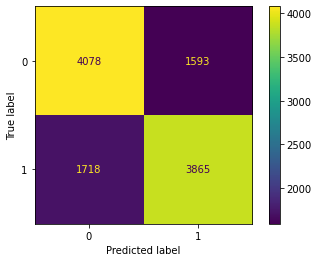

In [56]:
# KNN and StandardScaler for X_train_cat1
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_1', classifier_KNN_standard, X_val_cat1, y_val_cat1)


In [57]:
# KNN and StandardScaler for X_train_cat2
classifier_KNN_standard.fit(X_train_cat2, y_train_cat2)
print(classifier_KNN_standard.best_estimator_.get_params())


{'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=15))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=15), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.70      0.75      0.72      5671
           1       0.72      0.68      0.70      5583

    accuracy                           0.71     11254
   macro avg       0.71      0.71      0.71     11254
weighted avg       0.71      0.71      0.71     11254



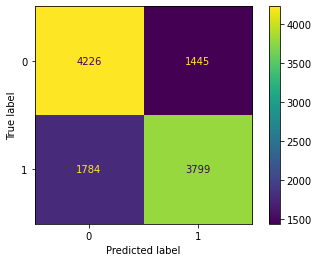

In [58]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_2', classifier_KNN_standard, X_val_cat2, y_val_cat2)


In [59]:
# KNN and MinMaxScaler for X_train_cat1
classifier_KNN_normal.fit(X_train_cat1, y_train_cat1)
print(classifier_KNN_normal.best_estimator_.get_params())


{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=13))], 'verbose': False, 'scaler': MinMaxScaler(), 'knn': KNeighborsClassifier(n_neighbors=13), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 13, 'knn__p': 2, 'knn__weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      5671
           1       0.71      0.68      0.70      5583

    accuracy                           0.70     11254
   macro avg       0.70      0.70      0.70     11254
weighted avg       0.70      0.70      0.70     11254



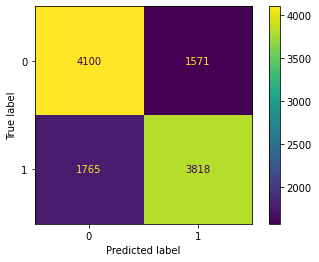

In [60]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_1', classifier_KNN_normal, X_val_cat1, y_val_cat1)

In [61]:
# KNN and MinMaxScaler for X_train_cat2
classifier_KNN_normal.fit(X_train_cat2, y_train_cat2)
print(classifier_KNN_normal.best_estimator_.get_params())

{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=17))], 'verbose': False, 'scaler': MinMaxScaler(), 'knn': KNeighborsClassifier(n_neighbors=17), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.70      0.75      0.72      5671
           1       0.72      0.68      0.70      5583

    accuracy                           0.71     11254
   macro avg       0.71      0.71      0.71     11254
weighted avg       0.71      0.71      0.71     11254



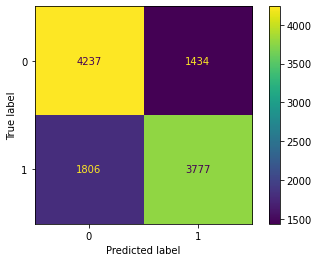

In [62]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_2', classifier_KNN_normal, X_val_cat2, y_val_cat2)

In [63]:
# Logistic regression and StandardScaler for X_train_cat1
classifier_log_reg_standard.fit(X_train_cat1, y_train_cat1)
print(classifier_log_reg_standard.best_estimator_.get_params())


{'memory': None, 'steps': [('scaler', StandardScaler()), ('log', LogisticRegression(l1_ratio=0.0, multi_class='ovr', penalty='elasticnet',
                   solver='saga'))], 'verbose': False, 'scaler': StandardScaler(), 'log': LogisticRegression(l1_ratio=0.0, multi_class='ovr', penalty='elasticnet',
                   solver='saga'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'log__C': 1.0, 'log__class_weight': None, 'log__dual': False, 'log__fit_intercept': True, 'log__intercept_scaling': 1, 'log__l1_ratio': 0.0, 'log__max_iter': 100, 'log__multi_class': 'ovr', 'log__n_jobs': None, 'log__penalty': 'elasticnet', 'log__random_state': None, 'log__solver': 'saga', 'log__tol': 0.0001, 'log__verbose': 0, 'log__warm_start': False}


              precision    recall  f1-score   support

           0       0.69      0.78      0.74      5671
           1       0.75      0.65      0.70      5583

    accuracy                           0.72     11254
   macro avg       0.72      0.72      0.72     11254
weighted avg       0.72      0.72      0.72     11254



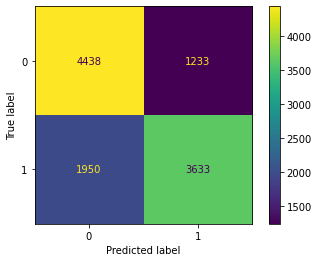

In [64]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_1', classifier_log_reg_standard, X_val_cat1, y_val_cat1)

In [65]:
# Logistic regression and StandardScaler for X_train_cat2
classifier_log_reg_standard.fit(X_train_cat2, y_train_cat2)
print(classifier_log_reg_standard.best_estimator_.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('log', LogisticRegression(l1_ratio=0.7368421052631579, multi_class='ovr',
                   penalty='elasticnet', solver='saga'))], 'verbose': False, 'scaler': StandardScaler(), 'log': LogisticRegression(l1_ratio=0.7368421052631579, multi_class='ovr',
                   penalty='elasticnet', solver='saga'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'log__C': 1.0, 'log__class_weight': None, 'log__dual': False, 'log__fit_intercept': True, 'log__intercept_scaling': 1, 'log__l1_ratio': 0.7368421052631579, 'log__max_iter': 100, 'log__multi_class': 'ovr', 'log__n_jobs': None, 'log__penalty': 'elasticnet', 'log__random_state': None, 'log__solver': 'saga', 'log__tol': 0.0001, 'log__verbose': 0, 'log__warm_start': False}


              precision    recall  f1-score   support

           0       0.70      0.78      0.74      5671
           1       0.75      0.66      0.70      5583

    accuracy                           0.72     11254
   macro avg       0.72      0.72      0.72     11254
weighted avg       0.72      0.72      0.72     11254



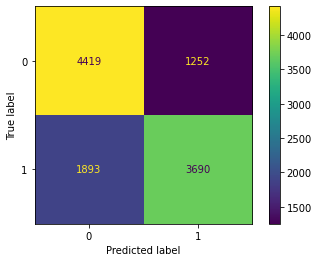

In [66]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_2', classifier_log_reg_standard, X_val_cat2, y_val_cat2)

In [67]:
# Logistic regression and MinMaxScaler for X_train_cat1
classifier_log_reg_normal.fit(X_train_cat1, y_train_cat1)
print(classifier_log_reg_normal.best_estimator_.get_params())

{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('log', LogisticRegression(l1_ratio=0.0, multi_class='ovr', penalty='elasticnet',
                   solver='saga'))], 'verbose': False, 'scaler': MinMaxScaler(), 'log': LogisticRegression(l1_ratio=0.0, multi_class='ovr', penalty='elasticnet',
                   solver='saga'), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'log__C': 1.0, 'log__class_weight': None, 'log__dual': False, 'log__fit_intercept': True, 'log__intercept_scaling': 1, 'log__l1_ratio': 0.0, 'log__max_iter': 100, 'log__multi_class': 'ovr', 'log__n_jobs': None, 'log__penalty': 'elasticnet', 'log__random_state': None, 'log__solver': 'saga', 'log__tol': 0.0001, 'log__verbose': 0, 'log__warm_start': False}


              precision    recall  f1-score   support

           0       0.69      0.78      0.74      5671
           1       0.75      0.65      0.70      5583

    accuracy                           0.72     11254
   macro avg       0.72      0.72      0.72     11254
weighted avg       0.72      0.72      0.72     11254



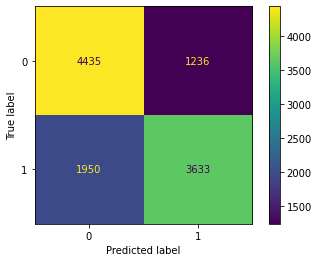

In [68]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_1', classifier_log_reg_normal, X_val_cat1, y_val_cat1)

In [69]:
# Logistic regression and MinMaxScaler for X_train_cat2
classifier_log_reg_normal.fit(X_train_cat2, y_train_cat2)
print(classifier_log_reg_normal.best_estimator_.get_params())

{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('log', LogisticRegression(l1_ratio=0.631578947368421, multi_class='ovr',
                   penalty='elasticnet', solver='saga'))], 'verbose': False, 'scaler': MinMaxScaler(), 'log': LogisticRegression(l1_ratio=0.631578947368421, multi_class='ovr',
                   penalty='elasticnet', solver='saga'), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'log__C': 1.0, 'log__class_weight': None, 'log__dual': False, 'log__fit_intercept': True, 'log__intercept_scaling': 1, 'log__l1_ratio': 0.631578947368421, 'log__max_iter': 100, 'log__multi_class': 'ovr', 'log__n_jobs': None, 'log__penalty': 'elasticnet', 'log__random_state': None, 'log__solver': 'saga', 'log__tol': 0.0001, 'log__verbose': 0, 'log__warm_start': False}


              precision    recall  f1-score   support

           0       0.70      0.78      0.74      5671
           1       0.75      0.66      0.70      5583

    accuracy                           0.72     11254
   macro avg       0.72      0.72      0.72     11254
weighted avg       0.72      0.72      0.72     11254



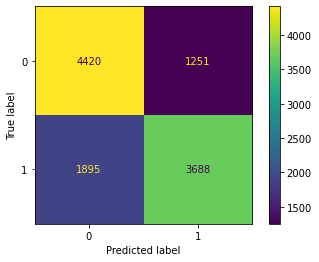

In [70]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_2', classifier_log_reg_normal, X_val_cat2, y_val_cat2)

In [75]:
# Random forest classifier and StandardScaler for X_train_cat1
classifier_rfc_standard.fit(X_train_cat1, y_train_cat1)
print(classifier_rfc_standard.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'memory': None, 'steps': [('scaler', StandardScaler()), ('random_forest', RandomForestClassifier(max_features='log2', n_estimators=300))], 'verbose': False, 'scaler': StandardScaler(), 'random_forest': RandomForestClassifier(max_features='log2', n_estimators=300), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'random_forest__bootstrap': True, 'random_forest__ccp_alpha': 0.0, 'random_forest__class_weight': None, 'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random_forest__max_features': 'log2', 'random_forest__max_leaf_nodes': None, 'random_forest__max_samples': None, 'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__min_weight_fraction_leaf': 0.0, 'random_forest__n_estimators': 300, 'random_forest__n_jobs': None, 'random_forest__oob_score': False, 'random_forest__random_state': None, '

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      5671
           1       0.70      0.69      0.69      5583

    accuracy                           0.70     11254
   macro avg       0.70      0.70      0.70     11254
weighted avg       0.70      0.70      0.70     11254



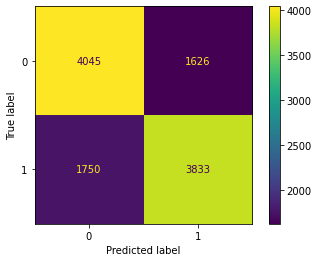

In [76]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_1', classifier_rfc_standard, X_val_cat1, y_val_cat1)

In [77]:
# Random forest classifier and StandardScaler for X_train_cat2
classifier_rfc_standard.fit(X_train_cat2, y_train_cat2)
print(classifier_rfc_standard.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'memory': None, 'steps': [('scaler', StandardScaler()), ('random_forest', RandomForestClassifier(max_features='sqrt', n_estimators=300))], 'verbose': False, 'scaler': StandardScaler(), 'random_forest': RandomForestClassifier(max_features='sqrt', n_estimators=300), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'random_forest__bootstrap': True, 'random_forest__ccp_alpha': 0.0, 'random_forest__class_weight': None, 'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random_forest__max_features': 'sqrt', 'random_forest__max_leaf_nodes': None, 'random_forest__max_samples': None, 'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__min_weight_fraction_leaf': 0.0, 'random_forest__n_estimators': 300, 'random_forest__n_jobs': None, 'random_forest__oob_score': False, 'random_forest__random_state': None, '

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      5671
           1       0.72      0.69      0.70      5583

    accuracy                           0.71     11254
   macro avg       0.71      0.71      0.71     11254
weighted avg       0.71      0.71      0.71     11254



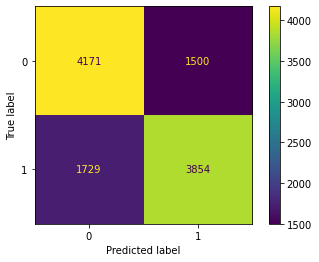

In [78]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_2', classifier_rfc_standard, X_val_cat2, y_val_cat2)

In [79]:
# Random forest classifier and MinMaxScaler for X_train_cat1
classifier_rfc_normal.fit(X_train_cat1, y_train_cat1)
print(classifier_rfc_normal.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('random_forest', RandomForestClassifier(max_features='sqrt', n_estimators=300))], 'verbose': False, 'scaler': MinMaxScaler(), 'random_forest': RandomForestClassifier(max_features='sqrt', n_estimators=300), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'random_forest__bootstrap': True, 'random_forest__ccp_alpha': 0.0, 'random_forest__class_weight': None, 'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random_forest__max_features': 'sqrt', 'random_forest__max_leaf_nodes': None, 'random_forest__max_samples': None, 'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__min_weight_fraction_leaf': 0.0, 'random_forest__n_estimators': 300, 'random_forest__n_jobs': None, 'random_forest__oob_score': False, 'random_forest__random_state': None, 'r

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      5671
           1       0.70      0.69      0.69      5583

    accuracy                           0.70     11254
   macro avg       0.70      0.70      0.70     11254
weighted avg       0.70      0.70      0.70     11254



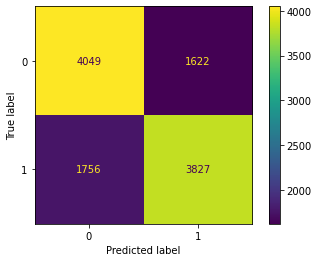

In [80]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_1', classifier_rfc_normal, X_val_cat1, y_val_cat1)

In [81]:
# Random forest classifier and MinMaxScaler for X_train_cat2
classifier_rfc_normal.fit(X_train_cat2, y_train_cat2)
print(classifier_rfc_normal.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'memory': None, 'steps': [('scaler', MinMaxScaler()), ('random_forest', RandomForestClassifier(max_features='sqrt', n_estimators=300))], 'verbose': False, 'scaler': MinMaxScaler(), 'random_forest': RandomForestClassifier(max_features='sqrt', n_estimators=300), 'scaler__clip': False, 'scaler__copy': True, 'scaler__feature_range': (0, 1), 'random_forest__bootstrap': True, 'random_forest__ccp_alpha': 0.0, 'random_forest__class_weight': None, 'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random_forest__max_features': 'sqrt', 'random_forest__max_leaf_nodes': None, 'random_forest__max_samples': None, 'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__min_weight_fraction_leaf': 0.0, 'random_forest__n_estimators': 300, 'random_forest__n_jobs': None, 'random_forest__oob_score': False, 'random_forest__random_state': None, 'r

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      5671
           1       0.72      0.69      0.70      5583

    accuracy                           0.71     11254
   macro avg       0.71      0.71      0.71     11254
weighted avg       0.71      0.71      0.71     11254



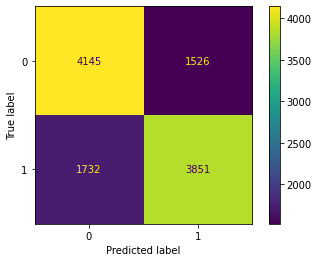

In [82]:
df_metrics = getEvaMetrics(df_metrics, 'df_categorical_2', classifier_rfc_normal, X_val_cat2, y_val_cat2)

In [87]:
df_metrics = df_metrics.sort_values('recall', ascending=False)
df_metrics

,dataset,model,recall,precision
0,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.692280,0.708135
9,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.690310,0.719836
11,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.689773,0.716199
8,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.686548,0.702143
10,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.685474,0.702331
2,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.683862,0.708480
1,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.680459,0.724447
3,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.676518,0.724813
5,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.660935,0.746661
7,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.660577,0.746710


In [90]:
print(f"The best dataset is: {df_metrics.iloc[0,0]}, \n\nthe best model is: {df_metrics.iloc[0,1]}, \n\nthe corresponding recall ratio is: {df_metrics.iloc[0,2]}, \n\nthe corresponding precision ratio is: {df_metrics.iloc[0,3]}")

The best dataset is: df_categorical_1, 

the best model is: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='recall'), 

the corresponding recall ratio is: 0.69228013612753, 

the corresponding precision ratio is: 0.7081348479296445


In [91]:
print(classifier_KNN_standard.best_estimator_.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=15))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=15), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'uniform'}


I choose the choice with the lowest false negative since patients with true disease should take treatment as early as possible, compare to have false positive. The best model in this case is KNN model with n_neighbors=15, and standardscaler.

---
### 2.5 Ensemble
Använd VotingClassifier() på datasetet som du valt och lägg in de bästa parametrarna för respektive modell.

**dataset I use: test data for df_categorical_1**

In the ensemble step, I train with the most training samples that I have: train+validation data, in order to make maximal use of the available information. 

Then I test Votingclassifier() with test data because these models did not see our test data before. So there is no data leakage problem.

In [111]:
X_train_val_cat1=pd.concat([X_train_cat1, X_val_cat1], axis=0)
y_train_val_cat1=pd.concat([y_train_cat1, y_val_cat1], axis=0)

In [112]:
X_train_val_cat1.shape, y_train_val_cat1.shape

((56952, 19), (56952,))

In [107]:
df_metrics_cat1 = df_metrics[df_metrics['dataset']=='df_categorical_1']
for i, model_cat1 in enumerate(df_metrics_cat1['model']):
    print(f'rank {i+1}. {model_cat1.best_estimator_.get_params()}\n\n')

rank 1. {'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=15))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=15), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'uniform'}


rank 2. {'memory': None, 'steps': [('scaler', StandardScaler()), ('random_forest', RandomForestClassifier(max_features='sqrt', n_estimators=300))], 'verbose': False, 'scaler': StandardScaler(), 'random_forest': RandomForestClassifier(max_features='sqrt', n_estimators=300), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'random_forest__bootstrap': True, 'random_forest__ccp_alpha': 0.0, 'random_forest__class_weight': None, 'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random

It is clearly presented that logistical models are ranked worst in the models, but actually the recall ratio is only 0.04 smaller. I do not think I should abslutely avoid logistical regression. 

Furthmore, to make ensemble based on variety of choices. I would compare the best parametrics for each algorithm that I used from the previous ranking, which means I include logistical regression in ensemble. 

The choosen models therefore are:
pipe_KNN_standard, pipe_rfc_standard, pipe_log_reg_standard

In [118]:
from sklearn.ensemble import VotingClassifier

pipe_KNN = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=15, metric= 'minkowski', weights='uniform'))])
pipe_rfc = Pipeline([("scaler", StandardScaler()), ("random_forest", RandomForestClassifier(max_features='sqrt', n_estimators=300, criterion="gini"))])
pipe_log = Pipeline([("scaler", StandardScaler()), ("log", LogisticRegression(
    l1_ratio=0.7368421052631579, C=1.0, tol=0.0001, solver="saga", multi_class = "ovr", max_iter=100, penalty="elasticnet"))])


vote_clf = VotingClassifier(
    [("KNN", pipe_KNN),
     ("log_reg", pipe_log),
     ("rfc", pipe_rfc)])

vote_clf.fit(X_train_val_cat1, y_train_val_cat1)



VotingClassifier(estimators=[('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=15))])),
                             ('log_reg',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('log',
                                               LogisticRegression(l1_ratio=0.7368421052631579,
                                                                  multi_class='ovr',
                                                                  penalty='elasticnet',
                                                                  solver='saga'))])),
                             ('rfc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('random_forest',
                                          

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      5730
           1       0.74      0.68      0.71      5525

    accuracy                           0.72     11255
   macro avg       0.73      0.72      0.72     11255
weighted avg       0.73      0.72      0.72     11255



,dataset,model,recall,precision
0,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.692280,0.708135
9,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.690310,0.719836
11,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.689773,0.716199
8,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.686548,0.702143
10,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.685474,0.702331
2,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.683862,0.708480
1,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.680459,0.724447
3,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.676518,0.724813
5,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.660935,0.746661
7,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.660577,0.746710


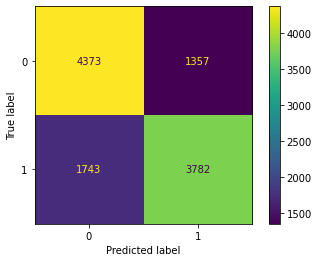

In [119]:
getEvaMetrics(df_metrics, 'df_catogorical_1', vote_clf, X_test_cat1, y_test_cat1)

The votingclassifier has a 0.684525 recall ratio using train+validation for training, and test for prediction.


### Checking my best model with recall ratio of test data
I am interested in checking my best model from the 2.4 section. 
The best model is KNN with n_neighbors=15 and standardscaler. It is selected by using validation data prediction. I am now using to predict a totally new dataset to this model: test dataset.

In [121]:
pipe_KNN.fit(X_train_val_cat1, y_train_val_cat1)
pipe_KNN.predict(X_test_cat1)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5730
           1       0.72      0.71      0.71      5525

    accuracy                           0.72     11255
   macro avg       0.72      0.72      0.72     11255
weighted avg       0.72      0.72      0.72     11255



,dataset,model,recall,precision
0,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.692280,0.708135
9,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.690310,0.719836
11,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.689773,0.716199
8,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.686548,0.702143
10,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.685474,0.702331
2,df_categorical_1,"GridSearchCV(cv=5,\n estimator=Pip...",0.683862,0.708480
1,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.680459,0.724447
3,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.676518,0.724813
5,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.660935,0.746661
7,df_categorical_2,"GridSearchCV(cv=5,\n estimator=Pip...",0.660577,0.746710


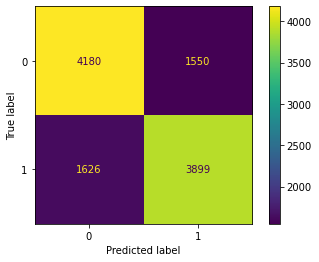

In [122]:
getEvaMetrics(df_metrics, 'df_catogorical_1', pipe_KNN, X_test_cat1, y_test_cat1)

The results is quite encouraging. My best model beats the VotingClassifier by 0.02. 

---
## 2.6 Evalueringar
Gör confusion matrices och classification reports för 2.4 och 2.5.

I presented the matrix and classification reports individually in 2.4 and 2.5.

---
### 2.7 "Deploy" - spara modell
Börja med att plocka ut 100 slumpmässigt valda rader från ditt dataset. Exportera dessa 100 samples i
test_samples.csv. Därefter tar du den bästa modellen och träna på all data vi har förutom de 100
datapunkterna du plockade ut. Spara därefter modellen i en .pkl-fil med hjälp av joblib.dump(). För
modellen kan du behöva använda argumentet compress för att komprimera om filstorleken för stor.

**Answers**:
Remember I randomly selected 100 samples in the stage of train, validation, test, 100 split. I have 100 samples which did not shown in the previous model selection process. Now I am going to use it as new coming dataset: test_samples.csv.

I train with alla train validation test data (without 100 patients): to get the final model. save 100 patients data as new patients and use as test data. 100 patients no labels, no evaluation metrics.

In [124]:
df_100_cat1.to_csv('data/test_samples.csv')

In [125]:
X_100 = df_100_cat1.drop("cardio", axis=1)
# use only the X part of df_100_cat1

In [126]:
# df_remain_cat1 contains the whole dataset without 100 choosen samples.

X_remain, y_remain = df_remain_cat1.drop("cardio", axis=1), df_remain_cat1["cardio"] 


In [ ]:
pipe_KNN.fit(X_remain, y_remain)


In [127]:
import joblib
joblib.dump(pipe_KNN, "cardio_disease_predictor")

['cardio_disease_predictor']

In [129]:
# Reload joblib
myBestModel = joblib.load('cardio_disease_predictor')

In [130]:
# use the model
myBestModel.predict(X_100)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)